# Examples

Sweep accesses JIRA and generates `QueryFrame` objects that are essentially wrappers around `pandas` [`DataFrames`](https://www.geeksforgeeks.org/python-pandas-dataframe/). As there are many libraries to analyse and specifically visualize data once it is represented in pandas, the format Sweep uses for making the result of a Jira query accessible makes it easy to analyse the data. The examples on this page illustrate that ease.

* [Word cloud](#wordcloud)

### Basic imports

Below, standard pandas, numpy, and matplotlib imports.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Import and initialize Sweep's Jira Notebook instance with which we connect to JIRA.

In [3]:
from jiranb import jiranb
jnb = jiranb()

Configuration:
* Reading configuration from: /Users/cjr/PycharmProjects/portfolio-sweep/src/../../sweep.yaml (/Users/cjr/PycharmProjects/sweep.yaml)
* Portfolio: Sweep - PyCharm dir
* Input mode: jira (Server=https://sweep.atlassian.net/)
* Loaded statuses: Backlog, Selected for Development, In Progress, Done
* Loaded plugins: HelloWorldPlugin, AbstractPlugin, AggregateDataPlugin, BurnupPlugin, CumulativeFlowPlugin, CycleTimePlugin, DetailsPlugin, IssueTypesPlugin, IssuesPlugin, TimeSpentPlugin, TreeMapPlugin
* Configured plugins: HelloWorldPlugin, DetailsPlugin, AggregateDataPlugin, TreeMapPlugin, CumulativeFlowPlugin, CycleTimePlugin, BurnupPlugin, TimeSpentPlugin, IssueTypesPlugin, IssuesPlugin
* Template input directory: service.web (package)
* Report output directory: /Users/cjr/reports


In [4]:
qf = jnb.jql('project=PLAN')

<a id='wordcloud'></a>
## Example: Word cloud

> *Goal*: show how `Sweep` can be used with any python library to generate visuals to analyse issues.

A Word cloud is an image showing us what a text is about. It does this by displaying the most frequent words as being biggest.

To create it, we use the [Word Cloud](http://amueller.github.io/word_cloud/) library. You can check out the examples and API at that site. 

Here, we generate a straightforward word cloud based on the `summary` and `description` fields of the issues in the result set in the `QueryFrame`.

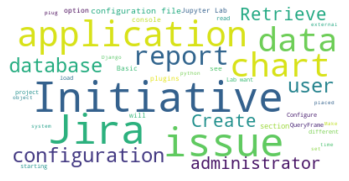

In [8]:
from wordcloud import WordCloud

# Take 'summary' and 'description' from issues and merge them into one large string
text = qf.issuedata['summary'].tolist() + qf.issuedata['description'].tolist()
text = ' '.join([i for i in text if i]) # Remove None values from the list and join

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=40, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()